
Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).
Answer:
•	Artificial Intelligence (AI): Broad field of computer science focused on creating systems that can mimic human intelligence (reasoning, decision-making, problem-solving). Example: Chatbots, self-driving cars.
•	Machine Learning (ML): Subset of AI where machines learn patterns from data and improve performance over time without explicit programming. Example: Spam email detection.
•	Deep Learning (DL): Subset of ML using neural networks with multiple layers to handle complex problems like image recognition, NLP. Example: Face recognition systems.
•	Data Science (DS): Interdisciplinary field that combines statistics, programming, and domain knowledge to analyze and extract insights from data. Example: Sales trend forecasting.
________________________________________
Question 2: What are the types of machine learning? Describe each with one real-world example.
Answer:
1.	Supervised Learning: Trains on labeled data (input-output pairs).
o	Example: Predicting house prices using historical data.
2.	Unsupervised Learning: Trains on unlabeled data to find patterns or clusters.
o	Example: Customer segmentation in marketing.
3.	Reinforcement Learning: Agent learns by interacting with environment and receiving rewards or penalties.
o	Example: Training a robot to walk or play chess.
________________________________________
Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.
Answer:
•	Overfitting: Model learns training data too well, including noise → performs poorly on unseen data.
•	Underfitting: Model is too simple → fails to capture underlying trends.
•	Bias-Variance Tradeoff: Balance between bias (error due to simplicity) and variance (error due to sensitivity to training data). Goal: achieve low bias + low variance.
________________________________________
Question 4: What are outliers in a dataset, and list three common techniques for handling them.
Answer:
•	Outliers: Data points that deviate significantly from the rest of the dataset.
•	Techniques:
1.	Removing outliers (if due to errors).
2.	Transforming values (e.g., log transformation).
3.	Capping using IQR or Z-score method (winsorization).
________________________________________
Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.
Answer:
•	Handling missing values:
o	Identify missing values.
o	Decide whether to remove rows/columns or impute values.
o	Use imputation techniques depending on data type.
•	Numerical: Mean/median imputation.
•	Categorical: Mode imputation or “Unknown” category.


In [2]:
# Question 6: Python – Create a synthetic imbalanced dataset and print class distribution.

from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Class distribution
unique, counts = np.unique(y, return_counts=True)
dist = dict(zip(unique, counts))
print("Class Distribution:", dist)


Class Distribution: {np.int64(0): np.int64(895), np.int64(1): np.int64(105)}


In [4]:
# Question 7: Implement one-hot encoding using pandas for colors.

import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])
one_hot = pd.get_dummies(df, columns=['Color'])
print(one_hot)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


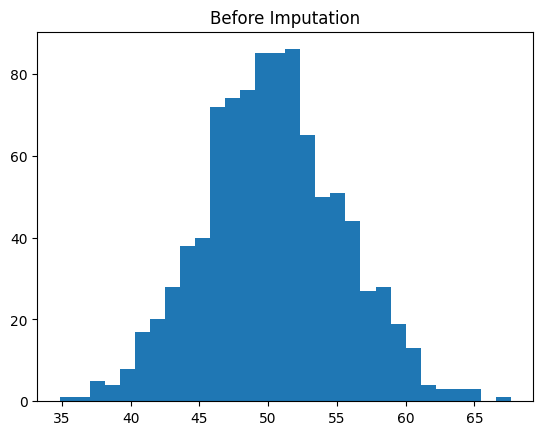

/tmp/ipython-input-2585884640.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


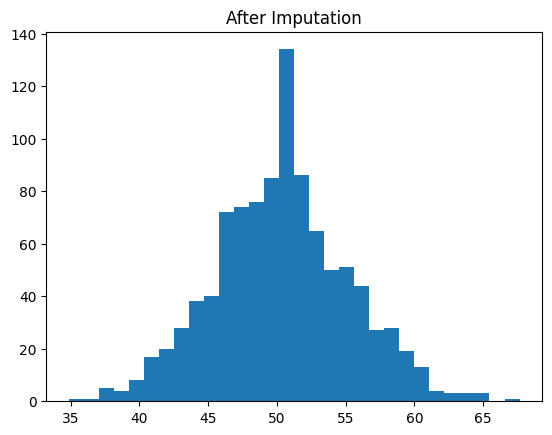

In [6]:
# Question 8: Generate normal distribution, add missing values, impute with mean, and plot histograms.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate data
data = np.random.normal(loc=50, scale=5, size=1000)

# Introduce missing values
data[np.random.randint(0, 1000, 50)] = np.nan

# Before imputation
plt.hist(data[~np.isnan(data)], bins=30)
plt.title("Before Imputation")
plt.show()

# Impute with mean
df = pd.DataFrame(data, columns=['Value'])
df['Value'].fillna(df['Value'].mean(), inplace=True)

# After imputation
plt.hist(df['Value'], bins=30)
plt.title("After Imputation")
plt.show()


In [9]:
# Question 9: Implement Min-Max scaling.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
print(scaled.flatten())


[0.         0.16666667 0.44444444 0.72222222 1.        ]


Q10: You are working as a data scientist for a retail company. You receive a customer transaction dataset that contains:

Missing ages,

Outliers in transaction amount,

A highly imbalanced target (fraud vs. non-fraud),

Categorical variables like payment method.

Explain the step-by-step data preparation plan you’d follow before training a machine learning model. Include how you’d address missing data, outliers, imbalance, and encoding.

Answer:

Step 1: Handle Missing Data

For numerical columns (e.g., Age), replace missing values with mean/median.

For categorical columns, replace with the mode (most frequent value).

Step 2: Handle Outliers

Use the IQR method or z-score to detect and cap/floor extreme values.

Step 3: Handle Imbalance

Use SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic minority samples.

Step 4: Encode Categorical Variables

Use one-hot encoding for categorical features like PaymentMethod.

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Example dataset
data = {
    'Age': [25, 30, np.nan, 40, 50, np.nan, 28, 32],
    'TransactionAmount': [100, 200, 5000, 300, 150, 120, 7000, 80],
    'PaymentMethod': ['Card', 'Cash', 'Card', 'UPI', 'Cash', 'Card', 'Cash', 'UPI'],
    'Fraud': [0, 0, 1, 0, 0, 1, 0, 1]   # imbalanced target
}

df = pd.DataFrame(data)

# Step 1: Handle missing values
df['Age'] = SimpleImputer(strategy='mean').fit_transform(df[['Age']])

# Step 2: Handle outliers (cap using IQR method)
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df['TransactionAmount'] = np.where(df['TransactionAmount'] > upper_limit, upper_limit,
                                   np.where(df['TransactionAmount'] < lower_limit, lower_limit,
                                            df['TransactionAmount']))

# Step 3: Handle imbalance using SMOTE
X = df.drop('Fraud', axis=1)
y = df['Fraud']
X_res, y_res = SMOTE(k_neighbors=1).fit_resample(pd.get_dummies(X), y)

# Step 4: Encoding already handled by get_dummies
print("Original Class Distribution:\n", y.value_counts())
print("\nResampled Class Distribution:\n", pd.Series(y_res).value_counts())
print("\nFinal Processed Data:\n", X_res.head())


Original Class Distribution:
 Fraud
0    5
1    3
Name: count, dtype: int64

Resampled Class Distribution:
 Fraud
0    5
1    5
Name: count, dtype: int64

Final Processed Data:
          Age  TransactionAmount  PaymentMethod_Card  PaymentMethod_Cash  \
0  25.000000              100.0                True               False   
1  30.000000              200.0               False                True   
2  34.166667             3515.0                True               False   
3  40.000000              300.0               False               False   
4  50.000000              150.0               False                True   

   PaymentMethod_UPI  
0              False  
1              False  
2              False  
3               True  
4              False  
